<a href="https://colab.research.google.com/github/beingraja/visual_question_answering/blob/main/vaq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sat Jul  3 04:35:02 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget http://images.cocodataset.org/zips/val2014.zip

--2021-07-03 04:36:12--  http://images.cocodataset.org/zips/val2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.110.195
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.110.195|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6645013297 (6.2G) [application/zip]
Saving to: ‘val2014.zip’

val2014.zip         100%[===================>]   6.19G  42.5MB/s    in 2m 32s  

2021-07-03 04:38:45 (41.7 MB/s) - ‘val2014.zip’ saved [6645013297/6645013297]



In [ ]:
!unzip /content/val2014.zip -d /content/images

In [ ]:
!wget https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Questions_Val_mscoco.zip

--2021-07-03 04:41:52--  https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Questions_Val_mscoco.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.161.128
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.161.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3494929 (3.3M) [application/zip]
Saving to: ‘v2_Questions_Val_mscoco.zip’

v2_Questions_Val_ms 100%[===================>]   3.33M  --.-KB/s    in 0.07s   

2021-07-03 04:41:53 (50.4 MB/s) - ‘v2_Questions_Val_mscoco.zip’ saved [3494929/3494929]



In [ ]:
!unzip /content/v2_Questions_Val_mscoco.zip -d /content/question

Archive:  /content/v2_Questions_Val_mscoco.zip
  inflating: /content/question/v2_OpenEnded_mscoco_val2014_questions.json  


In [ ]:
!wget https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Annotations_Val_mscoco.zip

--2021-07-03 04:41:53--  https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Annotations_Val_mscoco.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.161.128
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.161.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10518930 (10M) [application/zip]
Saving to: ‘v2_Annotations_Val_mscoco.zip’

v2_Annotations_Val_ 100%[===================>]  10.03M  --.-KB/s    in 0.1s    

2021-07-03 04:41:53 (70.5 MB/s) - ‘v2_Annotations_Val_mscoco.zip’ saved [10518930/10518930]



In [ ]:
!unzip /content/v2_Annotations_Val_mscoco.zip -d nnotions

Archive:  /content/v2_Annotations_Val_mscoco.zip
  inflating: nnotions/v2_mscoco_val2014_annotations.json  


In [ ]:
import  json
d  = json.load(open('/content/nnotions/v2_mscoco_val2014_annotations.json'))

In [ ]:
import  json
ques  = json.load(open('/content/question/v2_OpenEnded_mscoco_val2014_questions.json'))
ques['questions'][0]

{'image_id': 262148,
 'question': 'Where is he looking?',
 'question_id': 262148000}

In [ ]:
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt

def img(id,size):
  img = cv2.imread('/content/images/val2014/'+'COCO_val2014_000000'+str(id)+'.jpg')
  img = cv2.resize(img,(size,size))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  return img

IMG_SIZE = 128
DATASET_SIZE = 15000
images = []
questions = []
answers = []

for i in tqdm(range(35000,35000+DATASET_SIZE)):
  img_id = d['annotations'][i]['image_id']
  if len(str(img_id)) != 6:
    zero = '0'*(6-len(str(img_id))) 
    img_id = zero + str(img_id)
  image = img(img_id,IMG_SIZE)
  images.append(image)

  question = ques['questions'][i]['question']
  questions.append(question)

  answer = d['annotations'][i]['multiple_choice_answer']
  answers.append(answer)

100%|██████████| 15000/15000 [01:36<00:00, 155.98it/s]


In [ ]:
answer_set = []
for i in range(len(d['annotations'])):
  answer_set.append(d['annotations'][i]['multiple_choice_answer'])

QUESTION :  What color is the building?
ANSWERS :  brown


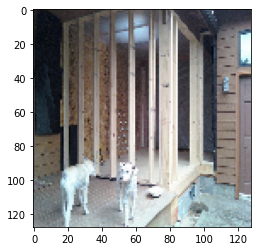

In [ ]:
def eval(idx):
  img  = images[idx]
  norm = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
  que = questions[idx]
  ans = answers[idx]
  plt.imshow(norm)
  print('QUESTION : ',que)
  print('ANSWERS : ',ans)
eval(20)


In [ ]:
!pip install tensorflow
!pip install tensorflow_hub
!pip install bert-for-tf2
!pip install sentencepiece

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

print("TF version: ", tf.__version__)
print("Hub version: ", hub.__version__)

TF version:  2.5.0
Hub version:  0.12.0


In [ ]:
from bert import bert_tokenization
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
 trainable=True)
BertTokenizer = bert_tokenization.FullTokenizer
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer =  bert_tokenization.FullTokenizer(vocab_file, do_lower_case)

In [ ]:
#preprocess
import numpy as np
for i in tqdm(range(len(questions))):
  images[i] = (np.asarray(images[i]).astype('float32') - 127.5) / 127.5
  answers[i] = answers[i].lower()
  questions[i] = ["[CLS]"] + tokenizer.tokenize(questions[i]) + ["[SEP]"]


100%|██████████| 15000/15000 [00:03<00:00, 3913.98it/s]


['[CLS]', 'what', 'design', 'is', 'the', 'bag', '?', '[SEP]']
flower


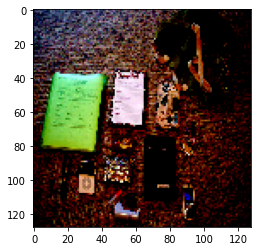

In [ ]:
print(questions[10])
print(answers[10])

plt.imshow(images[10])

In [ ]:
ans_dict = {}
ans_dict_inv = {}
y = []
a = 0
for i in answer_set:
  if i not in ans_dict:
    ans_dict[i] = a
    ans_dict_inv[a] = i
    a+= 1

    
for i in answers:
   y.append(ans_dict[i])
len(y),len(ans_dict),len(ans_dict_inv)

(15000, 14008, 14008)

In [ ]:
import pickle



# Store data (serialize)
with open('ans_dict_inv.pickle', 'wb') as handle:
    pickle.dump(ans_dict_inv, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Load data (deserialize)
with open('ans_dict_inv.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)

print(ans_dict_inv == unserialized_data)

True


In [ ]:
def get_masks(tokens, max_seq_length):
    """Mask for padding"""
    if len(tokens)>max_seq_length:
        raise IndexError("Token length more than max seq length!")
    return [1]*len(tokens) + [0] * (max_seq_length - len(tokens))


def get_segments(tokens, max_seq_length):
    """Segments: 0 for the first sequence, 1 for the second"""
    if len(tokens)>max_seq_length:
        raise IndexError("Token length more than max seq length!")
    segments = []
    current_segment_id = 0
    for token in tokens:
        segments.append(current_segment_id)
        if token == "[SEP]":
            current_segment_id = 1
    return segments + [0] * (max_seq_length - len(tokens))


def get_ids(tokens, tokenizer, max_seq_length):
    """Token ids from Tokenizer vocab"""
    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    input_ids = token_ids + [0] * (max_seq_length-len(token_ids))
    return input_ids

In [ ]:
input_ids = []
input_masks =  []                 
input_segments = []
max_seq_length = 128
for i in tqdm(questions):    
  input_id = get_ids(i, tokenizer, max_seq_length)
  input_mask = get_masks(i, max_seq_length)
  input_segment = get_segments(i, max_seq_length)
  input_ids.append(input_id)
  input_masks.append(input_mask)
  input_segments.append(input_segment)

print(len(input_ids))
print(len(input_masks))
print(len(input_segments))

100%|██████████| 15000/15000 [00:00<00:00, 79684.98it/s]

15000
15000
15000


In [ ]:
import numpy as np

input_ids = np.array(input_ids)
input_masks = np.array(input_masks)
input_segments = np.array(input_segments)
y = np.array(y)
images = np.array(images)

In [ ]:
y = tf.keras.utils.to_categorical(
    y, num_classes=len(ans_dict), dtype='float32'
)

In [ ]:
input_ids.shape,images.shape,y.shape,input_masks.shape,input_segments.shape

((15000, 128),
 (15000, 128, 128, 3),
 (15000, 14008),
 (15000, 128),
 (15000, 128))

In [ ]:
rn152 = tf.keras.applications.ResNet152V2(
    include_top=False, weights='imagenet', input_tensor=None, input_shape=(128, 128, 3)
)
new_input = rn152.input
hidden_layer = rn152.layers[-1].output
flat = tf.keras.layers.Flatten()
f = flat(hidden_layer)
dense = tf.keras.layers.Dense(1024,activation='relu')(f)

max_seq_length = 128 
input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
 name="input_word_ids")
input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
 name="input_mask")
segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
 name="segment_ids")
pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
f = flat(pooled_output)
dense_bert = tf.keras.layers.Dense(1024,activation='relu')(pooled_output)

con = tf.keras.layers.Concatenate()([dense,dense_bert])
final_dense = tf.keras.layers.Dense(1024,activation='relu',)(con)
final_dense = tf.keras.layers.Dropout(0.4)(final_dense)
output = final_dense = tf.keras.layers.Dense(len(ans_dict),activation='softmax',)(final_dense)

model = tf.keras.Model(inputs=[new_input,input_word_ids, input_mask, segment_ids],outputs= output) 
model.summary()

In [ ]:
from tensorflow.keras.models import load_model
model =  load_model('/content/drive/MyDrive/Colab Notebooks/vqa samples/vaq_model/model.h5',custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
model.compile(tf.keras.optimizers.Adam(lr=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
def prediction(question,image):
    image = (np.asarray(image).astype('float32') - 127.5) / 127.5
    question = ["[CLS]"] + tokenizer.tokenize(question) + ["[SEP]"]
    id = np.array(get_ids(question, tokenizer, max_seq_length)).reshape(1,128)
    mask = np.array(get_masks(question, max_seq_length)).reshape(1,128)
    segment = np.array(get_segments(question, max_seq_length)).reshape(1,128)
    pred = model.predict([image,id,mask,segment])
    return np.argmax(pred)

In [ ]:
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
!pip install fpdf
from fpdf import FPDF

import random
def img(id,size):
  f = '/content/images/val2014/'+'COCO_val2014_000000'+str(id)+'.jpg'
  img = cv2.imread(f)
  img = cv2.resize(img,(size,size))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  return img,f

def get_samples(p):
  IMG_SIZE = 128
  DATASET_SIZE = 30
  x = 20000
  a = 0
  pdf = FPDF()
  for j in tqdm(range(DATASET_SIZE)):
    i = random.randint(0,40000)
    img_id = d['annotations'][i]['image_id']
    if len(str(img_id)) != 6:
      zero = '0'*(6-len(str(img_id))) 
      img_id = zero + str(img_id)
    image,f = img(img_id,IMG_SIZE)
    image = image.reshape(1,128,128,3)
    question = ques['questions'][i]['question']
    answer = d['annotations'][i]['multiple_choice_answer']
    output  = prediction(question,image)
    answer_pred = ans_dict_inv[output]
    if a%3 ==0:
      pdf.add_page()
    pdf.set_font("Arial", size = 11)
    pdf.cell(0, 7, txt = "QUESTION : "+question,
        ln = 1, align = 'L')
    pdf.cell(0, 7, txt = "PREDICTION :"+ answer_pred,
        ln = 1, align = 'L')
    pdf.cell(0, 7, txt = "ANSWER :"+ answer,
        ln = 1, align = 'L')
    pdf.image(f,x = 80, w=64,h=64)
    a += 1

  pdf.output("/content/drive/MyDrive/Colab Notebooks/vqa samples/samples"+str(p)+".pdf")


  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40722 sha256=133894d925bacedc0bebfaebb4eaa89f1a2d822f4f1e98bc1aae0867d4d39635
  Stored in directory: /root/.cache/pip/wheels/9a/e9/77/4554ff5c99bc3f487c8d69620d8c41d99d54e9c54ab20ef4c9
Successfully built fpdf


In [ ]:
import os
for i in range(3):
  model.fit([images,input_ids, input_masks, input_segments],y,epochs=3,batch_size=32)
  get_samples(i)

f = open('/content/drive/MyDrive/Colab Notebooks/vqa samples/vaq_model/model.h5')
f.close()
os.remove('/content/drive/MyDrive/Colab Notebooks/vqa samples/vaq_model/model.h5')
model.save('/content/drive/MyDrive/Colab Notebooks/vqa samples/vaq_model/model.h5')


Epoch 1/3
469/469 [==============================] - 561s 1s/step - loss: 3.9773 - accuracy: 0.2708
Epoch 2/3
469/469 [==============================] - 500s 1s/step - loss: 3.4048 - accuracy: 0.3877
Epoch 3/3
469/469 [==============================] - 499s 1s/step - loss: 3.0171 - accuracy: 0.4729


100%|██████████| 30/30 [00:06<00:00,  4.45it/s]


Epoch 1/3
469/469 [==============================] - 500s 1s/step - loss: 2.6738 - accuracy: 0.5505
Epoch 2/3
469/469 [==============================] - 499s 1s/step - loss: 2.4086 - accuracy: 0.6025
Epoch 3/3
469/469 [==============================] - 499s 1s/step - loss: 2.1878 - accuracy: 0.6403


100%|██████████| 30/30 [00:03<00:00,  9.67it/s]


Epoch 1/3
 23/469 [>.............................] - ETA: 7:56 - loss: 1.8914 - accuracy: 0.6943

KeyboardInterrupt: ignored

In [ ]:
import os
f = open('/content/drive/MyDrive/Colab Notebooks/vqa samples/vaq_model/model.h5')
f.close()
os.remove('/content/drive/MyDrive/Colab Notebooks/vqa samples/vaq_model/model.h5')
model.save('/content/drive/MyDrive/Colab Notebooks/vqa samples/vaq_model/model.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
import os
f = open('/content/drive/MyDrive/Colab Notebooks/vqa samples/vaq_model/model.h5')
f.close()
os.remove('/content/drive/MyDrive/Colab Notebooks/vqa samples/vaq_model/model.h5')
model.save('/content/drive/MyDrive/Colab Notebooks/vqa samples/vaq_model/model.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
correct = 0
wrong = 0

def img(id,size):
  img = cv2.imread('/content/images/val2014/'+'COCO_val2014_000000'+str(id)+'.jpg')
  img = cv2.resize(img,(size,size))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  return img

IMG_SIZE = 128
DATASET_SIZE = 30
x = 20000

for i in tqdm(range(x,x+DATASET_SIZE)):
  img_id = d['annotations'][i]['image_id']
  if len(str(img_id)) != 6:
    zero = '0'*(6-len(str(img_id))) 
    img_id = zero + str(img_id)
  image = img(img_id,IMG_SIZE)
  image = image.reshape(1,128,128,3)
  question = ques['questions'][i]['question']
  answer = d['annotations'][i]['multiple_choice_answer']
  output  = prediction(question,image)
  answer_pred = ans_dict_inv[output]
  if answer_pred == answer:
    correct += 1
  else:
    wrong += 1
print('CORRECT : ',correct)
print('WRONG ; ',wrong)

In [ ]:
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
!pip install fpdf
from fpdf import FPDF
pdf = FPDF()
import random
def img(id,size):
  f = '/content/images/val2014/'+'COCO_val2014_000000'+str(id)+'.jpg'
  img = cv2.imread(f)
  img = cv2.resize(img,(size,size))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  return img,f



def get_sample():
  IMG_SIZE = 128
  DATASET_SIZE = 30
  x = 20000
  a = 0
  for j in tqdm(range(DATASET_SIZE)):
    i = random.randint(0,40000)

    img_id = d['annotations'][i]['image_id']
    if len(str(img_id)) != 6:
      zero = '0'*(6-len(str(img_id))) 
      img_id = zero + str(img_id)
    image,f = img(img_id,IMG_SIZE)
    image = image.reshape(1,128,128,3)
    question = ques['questions'][i]['question']
    answer = d['annotations'][i]['multiple_choice_answer']
    output  = prediction(question,image)
    answer_pred = ans_dict_inv[output]
    if a%3 ==0:
      pdf.add_page()
    pdf.set_font("Arial", size = 11)
    pdf.cell(0, 7, txt = "QUESTION : "+question,
        ln = 1, align = 'L')
    pdf.cell(0, 7, txt = "PREDICTION :"+ answer_pred,
        ln = 1, align = 'L')
    pdf.cell(0, 7, txt = "ANSWER :"+ answer,
        ln = 1, align = 'L')
    pdf.image(f,x = 80, w=64,h=64)
    a += 1

  pdf.output("samples.pdf")


In [ ]:
get_sample()

100%|██████████| 30/30 [00:52<00:00,  1.75s/it]


In [ ]:
os.listdir('/content/drive/MyDrive/projects/vqa/models')

[]